In [ ]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/Churn_Modelling.csv')


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.duplicated().sum()

np.int64(0)

In [10]:
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


In [11]:
df["Geography"].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [12]:
#RowNumber	CustomerId	Surname....	 these 3 are useless so lets drop
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# OHE for Geography	Gender
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [16]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [17]:
df[['Geography_Germany', 'Geography_Spain', 'Gender_Male']] = df[['Geography_Germany', 'Geography_Spain', 'Gender_Male']].astype(int)
display(df.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [18]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [26]:
X_test_trf

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [28]:
model = Sequential()

model.add(Dense(3,activation='sigmoid',input_dim=11)) # input layer 11 perceptrons
#model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='Adam',loss='binary_crossentropy')

In [31]:
model.fit(X_train_trf,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6895
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5541
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4879
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4620
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4465
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4345
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4380
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4266
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4393
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4271


In [32]:
model.layers[0].get_weights()
#  this will give all 33 weights and 3 biases for layer 0 to 1           11 inputs * 3 perceptrons = 33 weights + 3 biases

[array([[ 0.40271536, -0.03078813, -0.07514305],
        [-1.1975586 , -1.4721831 ,  0.36874935],
        [ 0.05614147,  0.0483376 , -0.22188303],
        [ 0.02669711,  0.01783887,  0.7712407 ],
        [ 0.97367513, -0.01930733,  0.07803389],
        [-0.12080348,  0.16510557,  0.17276822],
        [ 0.87489396,  0.1841648 , -1.0640411 ],
        [-0.03758224, -0.00757171,  0.07766989],
        [-0.60395443, -0.48531643,  0.4150336 ],
        [-0.1721978 ,  0.03011034,  0.10775256],
        [ 0.3324374 ,  0.17571159, -0.8214099 ]], dtype=float32),
 array([ 0.9649827 ,  0.36976746, -0.37699592], dtype=float32)]

In [34]:
model.layers[1].get_weights()
#  this will give all 33 weights and 3 biases for layer 0 to 1            3 perceptrons * 1 perceptron = 3 weights + 3 biases

[array([[-0.8844875],
        [-1.7358363],
        [ 0.9645161]], dtype=float32),
 array([-0.42596424], dtype=float32)]

In [39]:
y_temp = model.predict(X_test_trf)
# now if we see o/p is not 1 or 0 bcz we are using sigmoid and it gives probability

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [40]:
y_pred = (y_temp > 0.5).astype(int)
display(y_pred)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.819

# for better acc

## increase no. of epochs
## use relu instead of sigmoid
## increase number of hidden layers / no. of nodes in hidden layers

In [57]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [58]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


In [68]:
# validation_split: This parameter reserves a fraction of the training data to be used as validation data.

# specified during compile will be evaluated at the end of each epoch on this validation data.
# In this case, 20% of the training data (X_train, y_train) will be used for validation.
history = model.fit(X_train_trf,y_train,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7664 - loss: 0.5464 - val_accuracy: 0.8144 - val_loss: 0.4462
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8214 - loss: 0.4285 - val_accuracy: 0.8250 - val_loss: 0.4299
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8266 - loss: 0.4216 - val_accuracy: 0.8244 - val_loss: 0.4240
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8323 - loss: 0.4073 - val_accuracy: 0.8275 - val_loss: 0.4217
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8233 - loss: 0.4231 - val_accuracy: 0.8288 - val_loss: 0.4206
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8268 - loss: 0.4100 - val_accuracy: 0.8306 - val_loss: 0.4187
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8364 - loss: 0.4029 - val_accuracy: 0.8325 - val_loss: 0.4178
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8357 - loss: 0.4034 - val_accu

In [69]:
y_temp = model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [70]:
y_pred = (y_temp > 0.5).astype(int)
display(y_pred)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.86

In [72]:
history.history # it has 4 key value pairs of accuracy , loss , val_accuracy , val_loss

{'accuracy': [0.7945312261581421,
  0.819531261920929,
  0.8265625238418579,
  0.8295312523841858,
  0.8298437595367432,
  0.8317187428474426,
  0.8317187428474426,
  0.8343750238418579,
  0.8329687714576721,
  0.8334375023841858,
  0.8349999785423279,
  0.8335937261581421,
  0.8346874713897705,
  0.835156261920929,
  0.8339062333106995,
  0.8345312476158142,
  0.8357812762260437,
  0.8362500071525574,
  0.836718738079071,
  0.8371875286102295,
  0.8359375,
  0.8370312452316284,
  0.8368750214576721,
  0.8387500047683716,
  0.8396875262260437,
  0.8381249904632568,
  0.8382812738418579,
  0.8373437523841858,
  0.8376562595367432,
  0.836718738079071,
  0.8403124809265137,
  0.8404687643051147,
  0.8403124809265137,
  0.8421875238418579,
  0.8392187356948853,
  0.8420312404632568,
  0.8407812714576721,
  0.8418750166893005,
  0.8440625071525574,
  0.8431249856948853,
  0.8434374928474426,
  0.8451562523841858,
  0.844531238079071,
  0.8462499976158142,
  0.8471875190734863,
  0.84812498

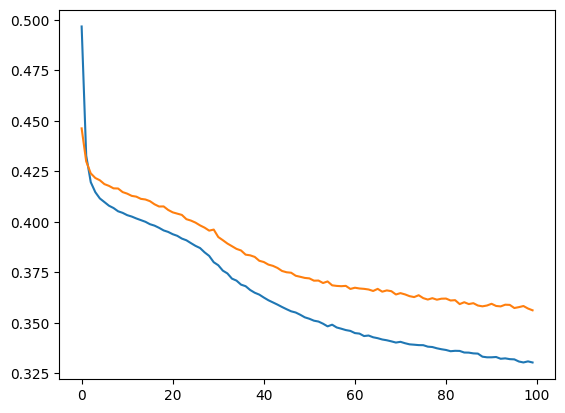

In [73]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

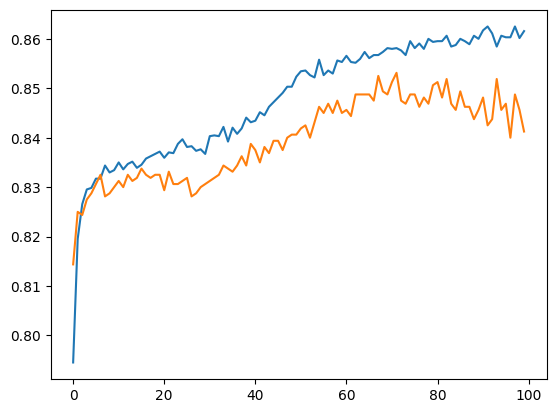

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])